<a href="https://colab.research.google.com/github/brianisinga/stock-price-predictions/blob/main/netflix_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('/content/NFLX.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:

#This line of code converts the 'Date' column in the tesla dataframe to datetime objects. This is useful for time series analysis and plotting.
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
print(f'the first date in the dataset is {df["Date"].min()}')
print(f'the last date in the dataset is {df["Date"].max()}')

the first date in the dataset is 2018-02-05 00:00:00
the last date in the dataset is 2022-02-04 00:00:00


In [8]:
print(f"the total number of days in the dataset is {df['Date'].max() - df['Date'].min()}")


the total number of days in the dataset is 1460 days 00:00:00


In [9]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [11]:
df.shape

(1009, 7)

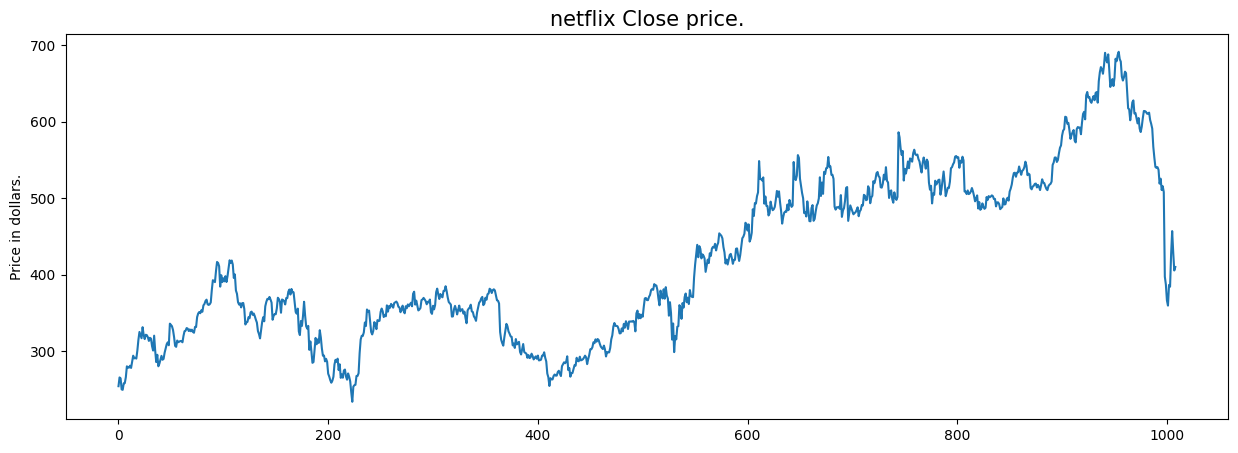

In [12]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('netflix Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [13]:
#checking for null values
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

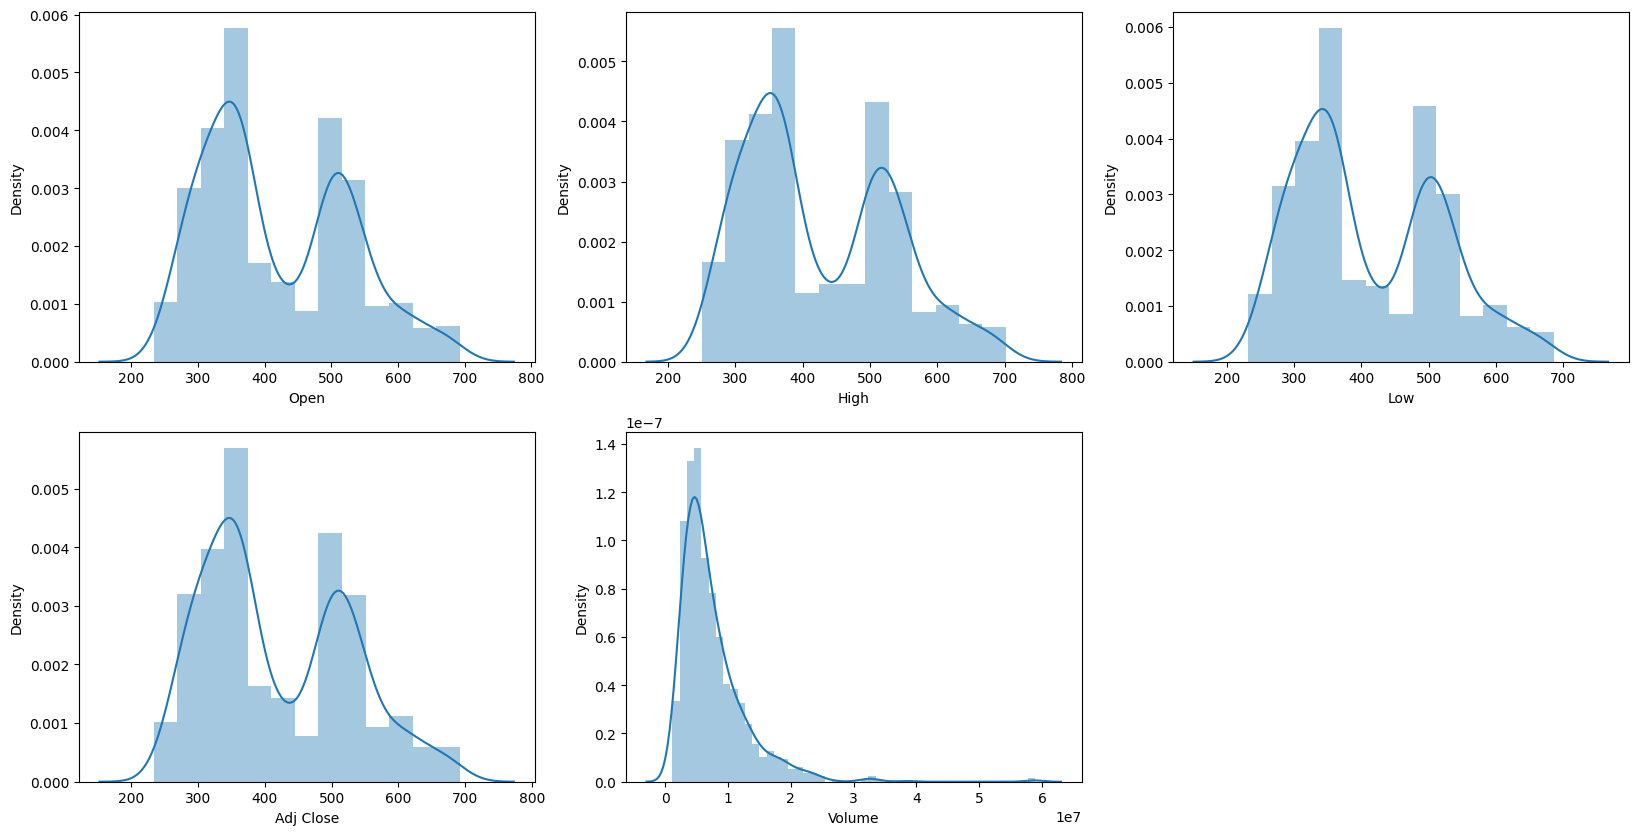

In [14]:
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

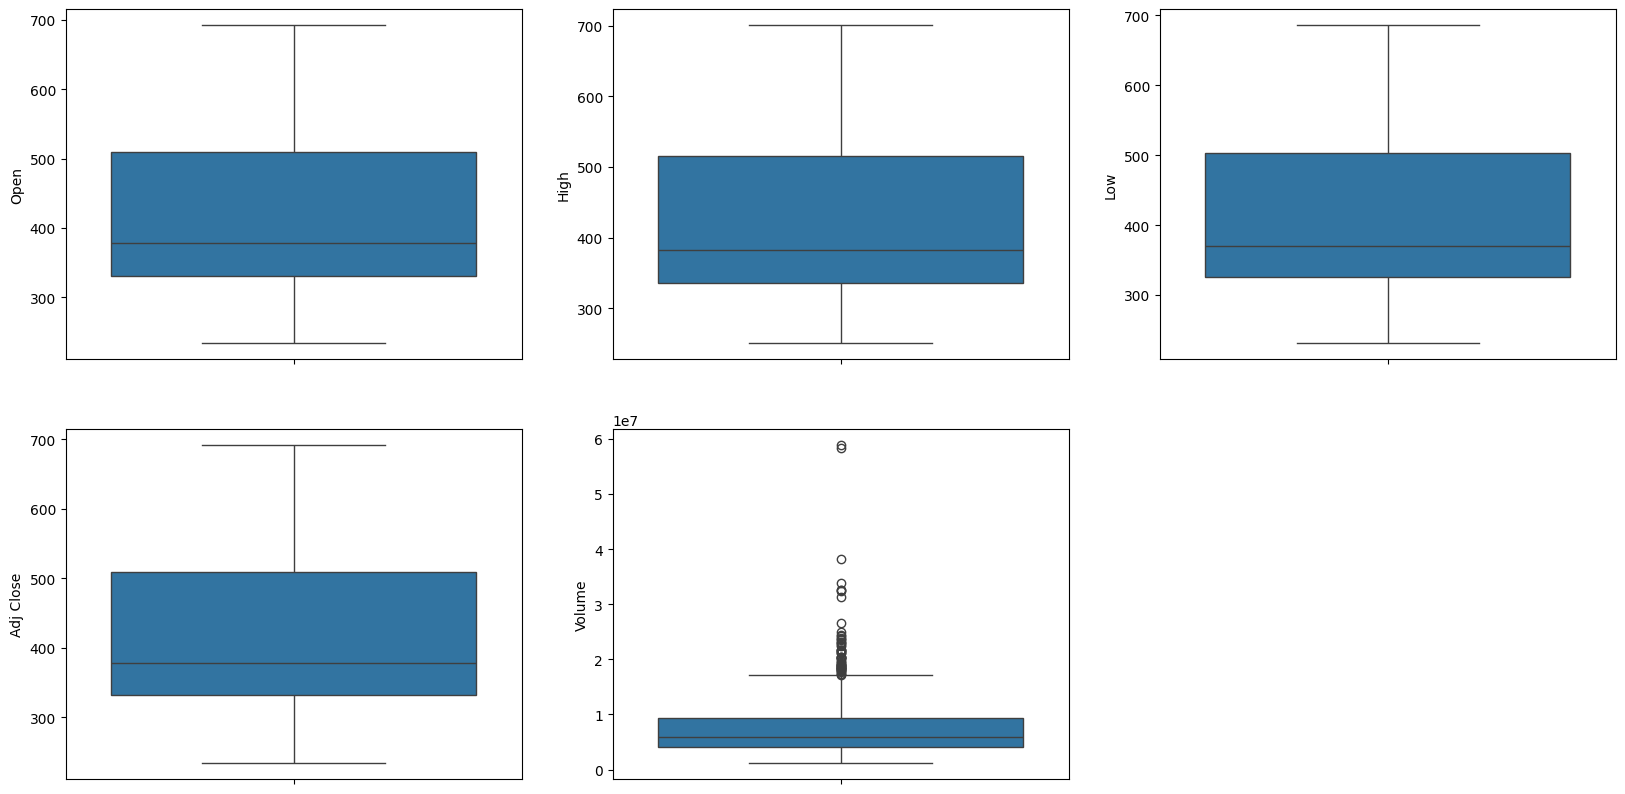

In [15]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()


In [16]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [17]:
#feature engineering
df['Date'] = df['Date'].astype(str) # Convert 'Date' column to string type
splitted = df['Date'].str.split('-', expand=True)
df['Year'] = splitted[0].astype(int)
df['Month'] = splitted[1].astype(int)
df['Day'] = splitted[2].astype(int)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,2,7
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,2,8
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,2,9


In [20]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,2,7,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,2,8,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,2,9,0


In [22]:
# Convert relevant columns to numeric before calculating the mean
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

data_grouped = df.groupby('Year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

TypeError: Could not convert 2018-02-052018-02-062018-02-072018-02-082018-02-092018-02-122018-02-132018-02-142018-02-152018-02-162018-02-202018-02-212018-02-222018-02-232018-02-262018-02-272018-02-282018-03-012018-03-022018-03-052018-03-062018-03-072018-03-082018-03-092018-03-122018-03-132018-03-142018-03-152018-03-162018-03-192018-03-202018-03-212018-03-222018-03-232018-03-262018-03-272018-03-282018-03-292018-04-022018-04-032018-04-042018-04-052018-04-062018-04-092018-04-102018-04-112018-04-122018-04-132018-04-162018-04-172018-04-182018-04-192018-04-202018-04-232018-04-242018-04-252018-04-262018-04-272018-04-302018-05-012018-05-022018-05-032018-05-042018-05-072018-05-082018-05-092018-05-102018-05-112018-05-142018-05-152018-05-162018-05-172018-05-182018-05-212018-05-222018-05-232018-05-242018-05-252018-05-292018-05-302018-05-312018-06-012018-06-042018-06-052018-06-062018-06-072018-06-082018-06-112018-06-122018-06-132018-06-142018-06-152018-06-182018-06-192018-06-202018-06-212018-06-222018-06-252018-06-262018-06-272018-06-282018-06-292018-07-022018-07-032018-07-052018-07-062018-07-092018-07-102018-07-112018-07-122018-07-132018-07-162018-07-172018-07-182018-07-192018-07-202018-07-232018-07-242018-07-252018-07-262018-07-272018-07-302018-07-312018-08-012018-08-022018-08-032018-08-062018-08-072018-08-082018-08-092018-08-102018-08-132018-08-142018-08-152018-08-162018-08-172018-08-202018-08-212018-08-222018-08-232018-08-242018-08-272018-08-282018-08-292018-08-302018-08-312018-09-042018-09-052018-09-062018-09-072018-09-102018-09-112018-09-122018-09-132018-09-142018-09-172018-09-182018-09-192018-09-202018-09-212018-09-242018-09-252018-09-262018-09-272018-09-282018-10-012018-10-022018-10-032018-10-042018-10-052018-10-082018-10-092018-10-102018-10-112018-10-122018-10-152018-10-162018-10-172018-10-182018-10-192018-10-222018-10-232018-10-242018-10-252018-10-262018-10-292018-10-302018-10-312018-11-012018-11-022018-11-052018-11-062018-11-072018-11-082018-11-092018-11-122018-11-132018-11-142018-11-152018-11-162018-11-192018-11-202018-11-212018-11-232018-11-262018-11-272018-11-282018-11-292018-11-302018-12-032018-12-042018-12-062018-12-072018-12-102018-12-112018-12-122018-12-132018-12-142018-12-172018-12-182018-12-192018-12-202018-12-212018-12-242018-12-262018-12-272018-12-282018-12-31 to numeric

In [23]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [24]:
#data spliting and normalization
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']